In [10]:
import numpy as np
import pandas as pd
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 300)

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv('genie-cohorts.csv')
df['cht'] = df['cht'].replace({
    0: 'Asian Female', 
    1: 'Asian Male', 
    2: 'Black Female', 
    3: 'Black Male', 
    4: 'White Female', 
    5: 'White Male'
})
df

,tissuename,ABI1,ABL1,ABL2,ACKR3,ACSL6,ACVR1,ACVR2A,AFDN,AFF1,AFF3,AFF4,AKAP9,AKT1,AKT2,AKT3,ALDH2,ALK,AMER1,APC,AR,ARAF,ARHGAP26,ARHGEF12,ARID1A,ARID1B,ARID2,ARNT,ASPSCR1,ASXL1,ASXL2,ATF1,ATIC,ATM,ATP1A1,ATP2B3,ATR,ATRX,AXIN1,AXIN2,B2M,BAP1,BARD1,BCL10,BCL11A,BCL11B,BCL2,BCL2L12,BCL3,BCL6,BCL7A,BCL9,BCOR,BCORL1,BCR,BIRC3,BIRC6,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD3,BRD4,BRIP1,BTG1,BTK,BUB1B,C15orf65,CACNA1D,CALR,CAMTA1,CANT1,CARD11,CARS,CASP3,CASP8,CBFA2T3,CBFB,CBL,CBLB,CBLC,CCDC6,CCNB1IP1,CCND1,CCND2,CCND3,CCNE1,CD274,CD28,CD74,CD79A,CD79B,CDC73,CDH1,CDH11,CDK12,CDK4,CDK6,CDKN1A,CDKN1B,CDKN2A,CDKN2C,CDX2,CEBPA,CHD2,CHD4,CHEK2,CHIC2,CHST11,CIC,CIITA,CLIP1,CLP1,CLTC,CLTCL1,CNBD1,CNBP,CNOT3,CNTNAP2,CNTRL,COL1A1,COL2A1,CREB1,CREB3L1,CREB3L2,CREBBP,CRLF2,CRTC1,CRTC3,CSF1R,CSF3R,CSMD3,CTCF,CTNNA2,CTNNB1,CTNND1,CTNND2,CUL3,CUX1,CXCR4,CYLD,CYP2C8,CYSLTR2,DAXX,DCC,DDB2,DDIT3,DDR2,DDX10,...,RARA,RB1,RBM10,RBM15,RECQL4,REL,RET,RGS7,RHOA,RHOH,RMI2,RNF213,RNF43,ROBO2,ROS1,RPL10,RPL22,RPL5,RPN1,RSPO2,RSPO3,RUNX1,RUNX1T1,SBDS,SDC4,SDHA,SDHAF2,SDHB,SDHC,SDHD,SEPT5,SEPT6,SEPT9,SET,SETBP1,SETD1B,SETD2,SETDB1,SF3B1,SFPQ,SGK1,SH2B3,SH3GL1,SLC34A2,SLC45A3,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMARCE1,SMC1A,SMO,SND1,SNX29,SOCS1,SOX2,SPECC1,SPEN,SPOP,SRC,SRGAP3,SRSF2,SRSF3,SS18,SS18L1,SSX1,SSX2,STAG1,STAG2,STAT3,STAT5B,STAT6,STIL,STK11,STRN,SUFU,SUZ12,SYK,TAF15,TAL1,TAL2,TBL1XR1,TBX3,TCEA1,TCF12,TCF3,TCF7L2,TCL1A,TEC,TERT,TET1,TET2,TFE3,TFEB,TFG,TFPT,TFRC,TGFBR2,THRAP3,TLX1,TLX3,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TNFRSF17,TOP1,TP53,TP63,TPM3,TPM4,TPR,TRAF7,TRIM24,TRIM27,TRIM33,TRIP11,TRRAP,TSC1,TSC2,TSHR,U2AF1,UBR5,USP6,USP8,VAV1,VHL,VTI1A,WAS,WIF1,WNK2,WRN,WT1,WWTR1,XPA,XPC,XPO1,YWHAE,ZBTB16,ZFHX3,ZMYM2,ZMYM3,ZNF331,ZNF384,ZNF521,ZNRF3,ZRSR2,cht
0,GENIE-COLU-00271-01,0,-1,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,-1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,-1,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,-1,0,0,0,-1,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Asian Female
1,GENIE-COLU-00274-01,0,1,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,-1,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1,0,0,0,-1,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Asian Female
2,GENIE-MSK-P-0007864-T01-IM5,0,-1,0,0,0,-1,0,0,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,-1,0,0,-1,-1,-1,0,0,-1,-1,0,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,0,0,-1,0,0,-1,0,0,-1,0,0,-1,0,-1,-1,-1,-1,-1,0,-1,-1,0,-1,0,0,0,-1,0,0,-1,0,0,-1,0,-1,-1,0,0,0,0,-1,-1,-1,-1,-1,0,0,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,0,-1,0,0,-1,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0,0,-1,-1,0,-1,0,1,0,0,-1,0,-1,0,0,0,-1,0,0,0,-1,0,...,-1,-1,-1,0,-1,-1,-1,0,-1,0,0,0,-1,0,-1,0,0,0,0,0,0,-1,0,0,0,-1,-1,-1,-1,-1,0,0,0,0,0,0,-1,0,-1,0,0,-1,0,0,0,-1,-1,-1,-1,-1,-1,0,0,-1,0,0,-1,-1,0,-1,-1,-1,0,-1,0,0,0,0,0,0,-1,-1,-1,0,0,-1,0,-1,-1,-1,0,0,0,0,-1,0,0,-1,-1,0,0,-1,-1,-1,0,0,0,0,0,1,0,0,0,-1,-1,-1,-1,0,-1,-1,-1,0,0,0,-1,0,0,0,0,0,-1,-1,-1,-1,0,0,0,0,-1,0,0,0,0,0,-1,0,0,0,-1,0,0,-1,0,0,0,0,0,0,-1,Asian Female
3,GENIE-MSK-P-0007864-T02-IM6,0,-1,0,0,0,-1,0,0,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,-1,0,0,-1,-1,-1,0,0,-1,-1,0,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,0,0,-1,0,0,-1,0,0,-1,0,0,-1,0,-1,-1

In [3]:
y = df['cht']
X = df.drop(columns=['tissuename', 'cht']) # drop the target column

In [4]:
# find features with same value for all samples and drop them
nunique = X.nunique()
cols_to_drop = nunique[nunique <= 1].index # 0 if all are missing, 1 if ther is only one catgeory/value
X_train = X.drop(cols_to_drop, axis='columns').reset_index(drop=True)

In [11]:
imputer = KNNImputer(missing_values=0, n_neighbors=1, weights="distance") 
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

In [13]:
X_train.astype('int64')

,ABL1,ABL2,ACVR1,ACVR2A,AFDN,AFF1,AFF3,AKAP9,AKT1,AKT2,AKT3,ALK,AMER1,APC,AR,ARAF,ARHGAP26,ARHGEF12,ARID1A,ARID1B,ARID2,ARNT,ASPSCR1,ASXL1,ASXL2,ATF1,ATM,ATR,ATRX,AXIN1,AXIN2,B2M,BAP1,BARD1,BCL10,BCL11A,BCL11B,BCL2,BCL2L12,BCL3,BCL6,BCL7A,BCL9,BCOR,BCORL1,BCR,BIRC3,BLM,BMPR1A,BRAF,BRCA1,BRCA2,BRD3,BRD4,BRIP1,BTG1,BTK,BUB1B,CACNA1D,CALR,CAMTA1,CARD11,CASP8,CBFA2T3,CBFB,CBL,CBLB,CBLC,CCDC6,CCND1,CCND2,CCND3,CCNE1,CD274,CD74,CD79A,CD79B,CDC73,CDH1,CDH11,CDK12,CDK4,CDK6,CDKN1A,CDKN1B,CDKN2A,CDKN2C,CEBPA,CHD2,CHD4,CHEK2,CHIC2,CHST11,CIC,CIITA,CLIP1,CLTC,CLTCL1,CNBD1,CNOT3,CNTNAP2,COL1A1,COL2A1,CREB1,CREB3L2,CREBBP,CRLF2,CRTC1,CRTC3,CSF1R,CSF3R,CSMD3,CTCF,CTNNA2,CTNNB1,CTNND2,CUL3,CUX1,CXCR4,CYLD,CYP2C8,CYSLTR2,DAXX,DCC,DDB2,DDIT3,DDR2,DDX10,DDX3X,DEK,DICER1,DNAJB1,DNM2,DNMT3A,DROSHA,EBF1,ECT2L,EED,EGFR,EIF1AX,EIF4A2,ELF3,EML4,EP300,EPAS1,EPHA3,EPHA7,ERBB2,ERBB3,ERBB4,...,PRKAR1A,PRKCB,PRPF40B,PSIP1,PTCH1,PTEN,PTPN11,PTPN6,PTPRB,PTPRC,PTPRD,PTPRK,PTPRT,QKI,RAC1,RAD21,RAD51B,RAF1,RALGDS,RANBP2,RARA,RB1,RBM10,RBM15,RECQL4,REL,RET,RGS7,RHOA,RHOH,RMI2,RNF213,RNF43,ROBO2,ROS1,RPL10,RPL22,RPL5,RPN1,RSPO2,RSPO3,RUNX1,RUNX1T1,SBDS,SDC4,SDHA,SDHAF2,SDHB,SDHC,SDHD,SEPT9,SETBP1,SETD2,SF3B1,SFPQ,SGK1,SH2B3,SLC34A2,SLC45A3,SMAD2,SMAD3,SMAD4,SMARCA4,SMARCB1,SMARCD1,SMARCE1,SMC1A,SMO,SND1,SNX29,SOCS1,SOX2,SPEN,SPOP,SRC,SRSF2,SS18,SS18L1,SSX1,SSX2,STAG1,STAG2,STAT3,STAT5B,STAT6,STK11,STRN,SUFU,SUZ12,SYK,TAF15,TAL1,TAL2,TBL1XR1,TBX3,TCF12,TCF3,TCF7L2,TCL1A,TERT,TET1,TET2,TFE3,TFEB,TFG,TFRC,TGFBR2,TLX1,TLX3,TMEM127,TMPRSS2,TNFAIP3,TNFRSF14,TNFRSF17,TOP1,TP53,TP63,TPM3,TPR,TRAF7,TRIM24,TRIM33,TRIP11,TRRAP,TSC1,TSC2,TSHR,U2AF1,UBR5,USP6,USP8,VHL,WAS,WNK2,WRN,WT1,WWTR1,XPA,XPC,XPO1,YWHAE,ZBTB16,ZFHX3,ZMYM2,ZMYM3,ZNF331,ZNF384,ZNF521,ZNRF3,ZRSR2
0,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1

<Axes: xlabel='FGFR4', ylabel='Percent'>

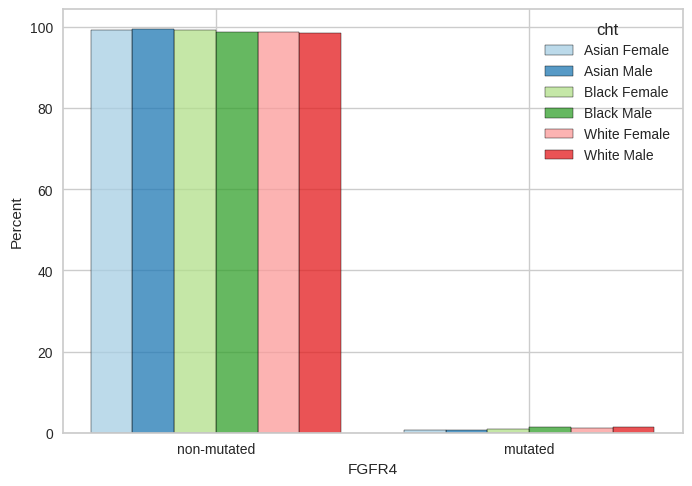

In [14]:
df_prepared = pd.concat([y, X_train], axis=1)
df_prepared['FGFR4'] = df_prepared['FGFR4'].replace({-1: 'non-mutated', 0: 'unknown', 1: 'mutated'})
sns.histplot(x=df_prepared["FGFR4"], hue=df_prepared["cht"], multiple="dodge", shrink=0.8,
                  stat = 'percent', common_norm=False, palette="Paired")

In [15]:
params = {
    "bootstrap": True, # necessary for oob_score --> default: True for Random Forest, False for Extremely Random Forest
    "class_weight": 'balanced',
    "n_estimators": 500,
    "n_jobs": -1,
    "max_depth": 100,
    "max_features": 0.8,
    "min_samples_leaf": 1,
    "oob_score": True,
    "random_state":  42,
  }

In [16]:
forest = RandomForestClassifier(**params)
forest = forest.fit(X_train, y)
forest.score(X_train, y)

0.7138301816833519

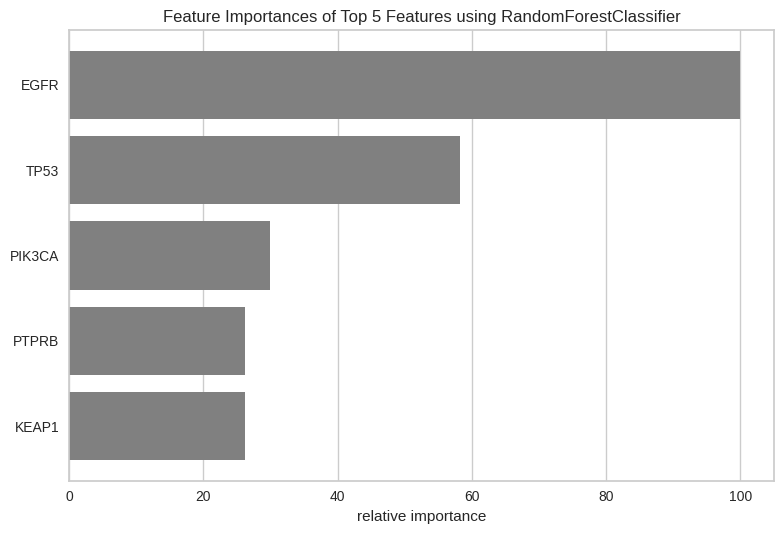

<Axes: title={'center': 'Feature Importances of Top 5 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [17]:
viz = FeatureImportances(forest, topn=5, is_fitted=True, relative=True, colors=["grey"])
viz.fit(X_train, y)
viz.show()